## CAISO April Net Load Trends

We will be using the gridstatusio API client for data fetching, and Plotly for data visualization. You can register for a Grid Status api key here: https://www.gridstatus.io/api

In [1]:
import pandas as pd
import plotly.graph_objects as go

import gridstatusio

gridstatusio.__version__

'0.8.0'

## Initialize the gridstatusio client

We instantiate the GridStatusClient, which we will use to fetch our data.

In [2]:
# make sure to set up API Key in environment variable
# or pass it in as a string
client = gridstatusio.GridStatusClient()

GridStatusClient(host=https://api.gridstatus.io/v1)

## Get data

Fetch data using the GridStatusClient. We will get the 'caiso_standardized_5_min' dataset from the beginning of the data to the most recent data.

We are setting a `limit` value for our queries to prevent them from returning too many rows. Our `limit` is relatively high in this notebook and if you are on a Grid Status free plan, you will want to set a much lower `limit` to avoid quickly using your monthly row limit.

In [3]:
QUERY_LIMIT = 750_000

750000

In [4]:
import warnings

warnings.filterwarnings("ignore")

df = client.get_dataset(
    dataset="caiso_standardized_5_min",
    start=None,  # start from beginning of data
    end=None,  # end at most recent data
    timezone="US/Pacific",  # return time stamps in Pacific time
)

Fetching Page 1...Done in 6.65 seconds. 
Done in 6.86 seconds. Total time: 13.51s. Avg per page: 6.76s
Done in 6.94 seconds. Total time: 20.45s. Avg per page: 6.82s
Done in 6.91 seconds. Total time: 27.36s. Avg per page: 6.84s
Done in 7.07 seconds. Total time: 34.43s. Avg per page: 6.89s
Done in 7.26 seconds. Total time: 41.69s. Avg per page: 6.95s
Done in 7.5 seconds. Total time: 49.19s. Avg per page: 7.03s
Done in 1.33 seconds. Total time: 50.52s. Avg per page: 6.32s

Total number of rows: 714425


,interval_start_local,interval_start_utc,interval_end_local,interval_end_utc,net_load,renewables,renewables_to_load_ratio,primary_power_source,load.load,load_forecast.publish_time_local,load_forecast.publish_time_utc,load_forecast.load_forecast,fuel_mix.solar,fuel_mix.wind,fuel_mix.geothermal,fuel_mix.biomass,fuel_mix.biogas,fuel_mix.small_hydro,fuel_mix.coal,fuel_mix.nuclear,fuel_mix.natural_gas,fuel_mix.large_hydro,fuel_mix.batteries,fuel_mix.imports,fuel_mix.other,storage.supply,storage.stand_alone_batteries,storage.hybrid_batteries,battery_discharge_to_load_ratio,battery_charge_to_load_ratio
0,2018-04-10 00:05:00-07:00,2018-04-10 07:05:00+00:00,2018-04-10 00:10:00-07:00,2018-04-10 07:10:00+00:00,21_953.0000,5_430.0000,0.2427,natural_gas,22_371.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,22_362.7808,0.0000,418.0000,689.0000,296.0000,232.0000,370.0000,-6.0000,1_618.0000,8_722.0000,3_425.0000,1.0000,7_029.0000,0.0000,NaN,NaN,NaN,0.0000,-0.0000
1,2018-04-10 00:10:00-07:00,2018-04-10 07:10:00+00:00,2018-04-10 00:15:00-07:00,2018-04-10 07:15:00+00:00,21_865.0000,5_512.0000,0.2468,natural_gas,22_330.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,22_260.1467,0.0000,465.0000,688.0000,297.0000,232.0000,366.0000,-6.0000,1_619.0000,8_739.0000,3_464.0000,6.0000,6_873.0000,0.0000,NaN,NaN,NaN,0.0003,-0.0003
2,2018-04-10 00:15:00-07:00,2018-04-10 07:15:00+00:00,2018-04-10 00:20:00-07:00,2018-04-10 07:20:00+00:00,21_687.0000,5_449.0000,0.2468,natural_gas,22_082.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,22_157.5125,0.0000,395.0000,687.0000,296.0000,232.0000,369.0000,-6.0000,1_619.0000,8_696.0000,3_470.0000,-14.0000,6_744.0000,0.0000,NaN,NaN,NaN,-0.0006,0.0006
3,2018-04-10 00:20:00-07:00,2018-04-10 07:20:00+00:00,2018-04-10 00:25:00-07:00,2018-04-10 07:25:00+00:00,21_579.0000,5_434.0000,0.2472,natural_gas,21_978.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,22_054.8783,0.0000,399.0000,686.0000,295.0000,233.0000,367.0000,-6.0000,1_616.0000,8_605.0000,3_454.0000,-38.0000,6_757.0000,0.0000,NaN,NaN,NaN,-0.0017,0.0017
4,2018-04-10 00:25:00-07:00,2018-04-10 07:25:00+00:00,2018-04-10 00:30:00-07:00,2018-04-10 07:30:00+00:00,21_432.0000,5_413.0000,0.2478,natural_gas,21_844.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,21_952.2442,0.0000,412.0000,687.0000,293.0000,232.0000,368.0000,-6.0000,1_615.0000,8_550.0000,3_421.0000,-39.0000,6_720.0000,0.0000,NaN,NaN,NaN,-0.0018,0.0018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714420,2025-01-23 14:05:00-08:00,2025-01-23 22:05:00+00:00,2025-01-23 14:10:00-08:00,2025-01-23 22:10:00+00:00,NaN,NaN,NaN,None,NaN,2025-01-22 09:10:00-08:00,2025-01-22 17:10:00+00:00,19_022.1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714421,2025-01-23 14:10:00-08:00,2025-01-23 22:10:00+00:00,2025-01-23 14:15:00-08:00,2025-01-23 22:15:00+00:00,NaN,NaN,NaN,None,NaN,2025-01-22 09:10:00-08:00,2025-01-22 17:10:00+00:00,19_022.1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714422,2025-01-23 14:15:00-08:00,2025-01-23 22:15:00+00:00,2025-01-23 14:20:00-08:00,2025-01-23 22:20:00+00:00,NaN,NaN,NaN,None,NaN,2025-01-22 09:10:00-08:00,2025-01-22 17:10:00+00:00,19_022.1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714423,2025-01-23 14:20:00-08:00,2025-01-23 22:20:00+00:00,2025-01-23 14:25:00-08:00,2025-01-23 22:25:00+00:00,NaN,NaN,NaN,None,NaN,2025-01-22 09:10:00-08:00,2025-01-22 17:10:00+00:00,19_022.1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import warnings

warnings.filterwarnings("ignore")

df = client.get_dataset(
    dataset="caiso_standardized_5_min",
    start=None,  # start from beginning of data
    end=None,  # end at most recent data
    timezone="US/Pacific",  # return time stamps in Pacific time
    limit=QUERY_LIMIT,
)

Fetching Page 1...Done in 7.23 seconds. 
Total rows: 100,000/750,000 (13.33% of limit)
Done in 7.44 seconds. Total time: 14.67s. Avg per page: 7.33s
Total rows: 200,000/750,000 (26.67% of limit)
Done in 6.4 seconds. Total time: 21.07s. Avg per page: 7.02s
Total rows: 300,000/750,000 (40.0% of limit)
Done in 8.16 seconds. Total time: 29.22s. Avg per page: 7.31s
Total rows: 400,000/750,000 (53.33% of limit)
Done in 7.07 seconds. Total time: 36.29s. Avg per page: 7.26s
Total rows: 500,000/750,000 (66.67% of limit)
Done in 7.0 seconds. Total time: 43.28s. Avg per page: 7.21s
Total rows: 600,000/750,000 (80.0% of limit)
Done in 7.04 seconds. Total time: 50.33s. Avg per page: 7.19s
Total rows: 700,000/750,000 (93.33% of limit)
Done in 1.63 seconds. Total time: 51.96s. Avg per page: 6.49s
Total rows: 714,425/750,000 (95.26% of limit)

Total number of rows: 714425


,interval_start_local,interval_start_utc,interval_end_local,interval_end_utc,net_load,renewables,renewables_to_load_ratio,primary_power_source,load.load,load_forecast.publish_time_local,load_forecast.publish_time_utc,load_forecast.load_forecast,fuel_mix.solar,fuel_mix.wind,fuel_mix.geothermal,fuel_mix.biomass,fuel_mix.biogas,fuel_mix.small_hydro,fuel_mix.coal,fuel_mix.nuclear,fuel_mix.natural_gas,fuel_mix.large_hydro,fuel_mix.batteries,fuel_mix.imports,fuel_mix.other,storage.supply,storage.stand_alone_batteries,storage.hybrid_batteries,battery_discharge_to_load_ratio,battery_charge_to_load_ratio
0,2018-04-10 00:05:00-07:00,2018-04-10 07:05:00+00:00,2018-04-10 00:10:00-07:00,2018-04-10 07:10:00+00:00,21_953.0000,5_430.0000,0.2427,natural_gas,22_371.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,22_362.7808,0.0000,418.0000,689.0000,296.0000,232.0000,370.0000,-6.0000,1_618.0000,8_722.0000,3_425.0000,1.0000,7_029.0000,0.0000,NaN,NaN,NaN,0.0000,-0.0000
1,2018-04-10 00:10:00-07:00,2018-04-10 07:10:00+00:00,2018-04-10 00:15:00-07:00,2018-04-10 07:15:00+00:00,21_865.0000,5_512.0000,0.2468,natural_gas,22_330.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,22_260.1467,0.0000,465.0000,688.0000,297.0000,232.0000,366.0000,-6.0000,1_619.0000,8_739.0000,3_464.0000,6.0000,6_873.0000,0.0000,NaN,NaN,NaN,0.0003,-0.0003
2,2018-04-10 00:15:00-07:00,2018-04-10 07:15:00+00:00,2018-04-10 00:20:00-07:00,2018-04-10 07:20:00+00:00,21_687.0000,5_449.0000,0.2468,natural_gas,22_082.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,22_157.5125,0.0000,395.0000,687.0000,296.0000,232.0000,369.0000,-6.0000,1_619.0000,8_696.0000,3_470.0000,-14.0000,6_744.0000,0.0000,NaN,NaN,NaN,-0.0006,0.0006
3,2018-04-10 00:20:00-07:00,2018-04-10 07:20:00+00:00,2018-04-10 00:25:00-07:00,2018-04-10 07:25:00+00:00,21_579.0000,5_434.0000,0.2472,natural_gas,21_978.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,22_054.8783,0.0000,399.0000,686.0000,295.0000,233.0000,367.0000,-6.0000,1_616.0000,8_605.0000,3_454.0000,-38.0000,6_757.0000,0.0000,NaN,NaN,NaN,-0.0017,0.0017
4,2018-04-10 00:25:00-07:00,2018-04-10 07:25:00+00:00,2018-04-10 00:30:00-07:00,2018-04-10 07:30:00+00:00,21_432.0000,5_413.0000,0.2478,natural_gas,21_844.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,21_952.2442,0.0000,412.0000,687.0000,293.0000,232.0000,368.0000,-6.0000,1_615.0000,8_550.0000,3_421.0000,-39.0000,6_720.0000,0.0000,NaN,NaN,NaN,-0.0018,0.0018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714420,2025-01-23 14:05:00-08:00,2025-01-23 22:05:00+00:00,2025-01-23 14:10:00-08:00,2025-01-23 22:10:00+00:00,NaN,NaN,NaN,None,NaN,2025-01-22 09:10:00-08:00,2025-01-22 17:10:00+00:00,19_022.1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714421,2025-01-23 14:10:00-08:00,2025-01-23 22:10:00+00:00,2025-01-23 14:15:00-08:00,2025-01-23 22:15:00+00:00,NaN,NaN,NaN,None,NaN,2025-01-22 09:10:00-08:00,2025-01-22 17:10:00+00:00,19_022.1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714422,2025-01-23 14:15:00-08:00,2025-01-23 22:15:00+00:00,2025-01-23 14:20:00-08:00,2025-01-23 22:20:00+00:00,NaN,NaN,NaN,None,NaN,2025-01-22 09:10:00-08:00,2025-01-22 17:10:00+00:00,19_022.1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714423,2025-01-23 14:20:00-08:00,2025-01-23 22:20:00+00:00,2025-01-23 14:25:00-08:00,2025-01-23 22:25:00+00:00,NaN,NaN,NaN,None,NaN,2025-01-22 09:10:00-08:00,2025-01-22 17:10:00+00:00,19_022.1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df

,interval_start_local,interval_start_utc,interval_end_local,interval_end_utc,net_load,renewables,renewables_to_load_ratio,primary_power_source,load.load,load_forecast.publish_time_local,load_forecast.publish_time_utc,load_forecast.load_forecast,fuel_mix.solar,fuel_mix.wind,fuel_mix.geothermal,fuel_mix.biomass,fuel_mix.biogas,fuel_mix.small_hydro,fuel_mix.coal,fuel_mix.nuclear,fuel_mix.natural_gas,fuel_mix.large_hydro,fuel_mix.batteries,fuel_mix.imports,fuel_mix.other,storage.supply,storage.stand_alone_batteries,storage.hybrid_batteries,battery_discharge_to_load_ratio,battery_charge_to_load_ratio
0,2018-04-10 00:05:00-07:00,2018-04-10 07:05:00+00:00,2018-04-10 00:10:00-07:00,2018-04-10 07:10:00+00:00,21_953.0000,5_430.0000,0.2427,natural_gas,22_371.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,22_362.7808,0.0000,418.0000,689.0000,296.0000,232.0000,370.0000,-6.0000,1_618.0000,8_722.0000,3_425.0000,1.0000,7_029.0000,0.0000,NaN,NaN,NaN,0.0000,-0.0000
1,2018-04-10 00:10:00-07:00,2018-04-10 07:10:00+00:00,2018-04-10 00:15:00-07:00,2018-04-10 07:15:00+00:00,21_865.0000,5_512.0000,0.2468,natural_gas,22_330.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,22_260.1467,0.0000,465.0000,688.0000,297.0000,232.0000,366.0000,-6.0000,1_619.0000,8_739.0000,3_464.0000,6.0000,6_873.0000,0.0000,NaN,NaN,NaN,0.0003,-0.0003
2,2018-04-10 00:15:00-07:00,2018-04-10 07:15:00+00:00,2018-04-10 00:20:00-07:00,2018-04-10 07:20:00+00:00,21_687.0000,5_449.0000,0.2468,natural_gas,22_082.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,22_157.5125,0.0000,395.0000,687.0000,296.0000,232.0000,369.0000,-6.0000,1_619.0000,8_696.0000,3_470.0000,-14.0000,6_744.0000,0.0000,NaN,NaN,NaN,-0.0006,0.0006
3,2018-04-10 00:20:00-07:00,2018-04-10 07:20:00+00:00,2018-04-10 00:25:00-07:00,2018-04-10 07:25:00+00:00,21_579.0000,5_434.0000,0.2472,natural_gas,21_978.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,22_054.8783,0.0000,399.0000,686.0000,295.0000,233.0000,367.0000,-6.0000,1_616.0000,8_605.0000,3_454.0000,-38.0000,6_757.0000,0.0000,NaN,NaN,NaN,-0.0017,0.0017
4,2018-04-10 00:25:00-07:00,2018-04-10 07:25:00+00:00,2018-04-10 00:30:00-07:00,2018-04-10 07:30:00+00:00,21_432.0000,5_413.0000,0.2478,natural_gas,21_844.0000,2018-04-08 09:10:00-07:00,2018-04-08 16:10:00+00:00,21_952.2442,0.0000,412.0000,687.0000,293.0000,232.0000,368.0000,-6.0000,1_615.0000,8_550.0000,3_421.0000,-39.0000,6_720.0000,0.0000,NaN,NaN,NaN,-0.0018,0.0018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714420,2025-01-23 14:05:00-08:00,2025-01-23 22:05:00+00:00,2025-01-23 14:10:00-08:00,2025-01-23 22:10:00+00:00,NaN,NaN,NaN,None,NaN,2025-01-22 09:10:00-08:00,2025-01-22 17:10:00+00:00,19_022.1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714421,2025-01-23 14:10:00-08:00,2025-01-23 22:10:00+00:00,2025-01-23 14:15:00-08:00,2025-01-23 22:15:00+00:00,NaN,NaN,NaN,None,NaN,2025-01-22 09:10:00-08:00,2025-01-22 17:10:00+00:00,19_022.1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714422,2025-01-23 14:15:00-08:00,2025-01-23 22:15:00+00:00,2025-01-23 14:20:00-08:00,2025-01-23 22:20:00+00:00,NaN,NaN,NaN,None,NaN,2025-01-22 09:10:00-08:00,2025-01-22 17:10:00+00:00,19_022.1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714423,2025-01-23 14:20:00-08:00,2025-01-23 22:20:00+00:00,2025-01-23 14:25:00-08:00,2025-01-23 22:25:00+00:00,NaN,NaN,NaN,None,NaN,2025-01-22 09:10:00-08:00,2025-01-22 17:10:00+00:00,19_022.1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing data

Extract the data for the month of April and create additional columns for year and time. Then, calculate the average net load for each year and time combination.

In [7]:
apr_data = df[df["interval_start_local"].dt.month == 4].copy()

apr_data["year"] = apr_data["interval_start_local"].dt.year
apr_data["hh:mm"] = apr_data["interval_start_local"].dt.strftime("%H:%M")

net_load_apr_avg = (
    apr_data.groupby(["year", "hh:mm"])[["net_load"]].mean().reset_index()
)

# append 24:00 so tick shows up on plot
net_load_apr_avg = pd.concat(
    [net_load_apr_avg, pd.DataFrame({"year": 2023, "hh:mm": ["24:00"]})]
)

net_load_apr_avg

,year,hh:mm,net_load
0,2018,00:00,18_838.1000
1,2018,00:05,18_886.3810
2,2018,00:10,18_831.4762
3,2018,00:15,18_728.5714
4,2018,00:20,18_629.1905
...,...,...,...
2012,2024,23:40,17_616.8333
2013,2024,23:45,17_526.2000
2014,2024,23:50,17_440.9333
2015,2024,23:55,17_339.0667


## Preprocessing data for minimum net load day in 2023

Extract the data for 2023 and find the day with the minimum net load.

In [8]:
apr_2023 = apr_data[apr_data["year"] == 2023]

# get time min load occurred in 2033
min_net_load_time = apr_2023.loc[apr_2023["net_load"].idxmin(), "interval_start_local"]

# select data for only that day
min_net_load_day_2023 = apr_2023[
    apr_2023["interval_start_local"].dt.date == min_net_load_time.date()
]
min_net_load_day_2023[["interval_start_local", "hh:mm", "net_load"]]

,interval_start_local,hh:mm,net_load
529631,2023-04-23 00:00:00-07:00,00:00,17_487.0000
529632,2023-04-23 00:05:00-07:00,00:05,17_590.0000
529633,2023-04-23 00:10:00-07:00,00:10,17_558.0000
529634,2023-04-23 00:15:00-07:00,00:15,17_402.0000
529635,2023-04-23 00:20:00-07:00,00:20,17_285.0000
...,...,...,...
529914,2023-04-23 23:35:00-07:00,23:35,16_612.0000
529915,2023-04-23 23:40:00-07:00,23:40,16_423.0000
529916,2023-04-23 23:45:00-07:00,23:45,16_266.0000
529917,2023-04-23 23:50:00-07:00,23:50,16_137.0000


## Plotting data with Plotly

Here we create an interactive plot using Plotly. We plot net load over time for each year, with different colors for different years, and also add a special line for the day in 2023 with the minimum net load.

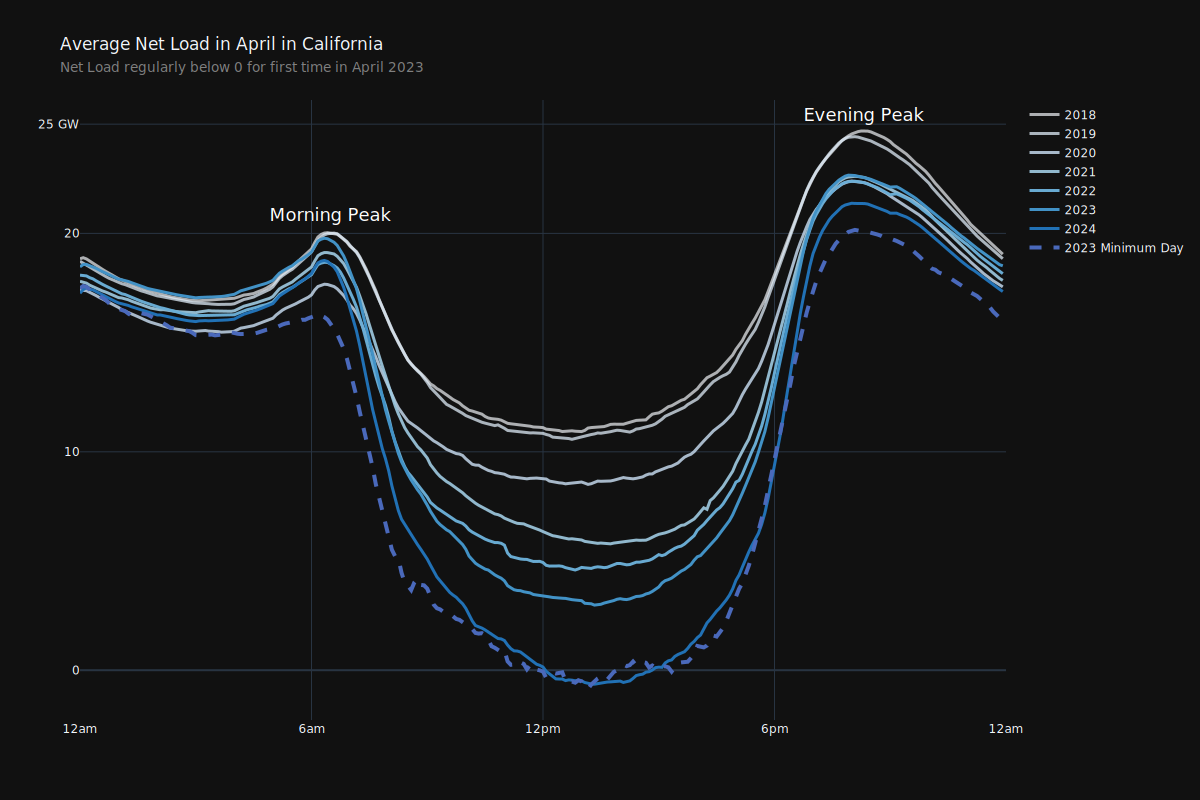

In [9]:
# Import plotly libraries
import plotly.express as px

# Define figure
fig = go.Figure()

# Get unique years and define color gradient
unique_years = net_load_apr_avg["year"].unique()
blues = px.colors.sequential.Blues[: len(unique_years)]

# Add line traces for net_load per year
for year, color in zip(unique_years, blues):
    # Filter net load data for the current year
    year_data = net_load_apr_avg[net_load_apr_avg["year"] == year]

    fig.add_trace(
        go.Scatter(
            x=year_data["hh:mm"],
            y=year_data["net_load"] / 1000,
            mode="lines",
            name=str(year),
            line=dict(color=color, width=3),
            opacity=min(0.6 + (year - 2017) * 0.075, 1),
        )
    )

# Add trace for minimum net_load_day in 2023
fig.add_trace(
    go.Scatter(
        x=min_net_load_day_2023["hh:mm"],
        y=min_net_load_day_2023["net_load"] / 1000,
        mode="lines",
        name="2023 Minimum Day",
        line=dict(color="#4a69bb", width=4, dash="dash"),
        opacity=1,
    )
)

# Define axis tick values
x_tick_values = ["00:00", "06:00", "12:00", "18:00", "24:00"]
y_tick_values = [0, 10, 20, 25]

# Update layout with title, subtitle, and custom axis tick labels
fig.update_layout(
    title="Average Net Load in April in California<br><span style='font-size:0.8em;color:gray'>Net Load regularly below 0 for first time in April 2023 </span>",  # noqa
    xaxis=dict(
        tickmode="array",
        tickvals=x_tick_values,
        ticktext=["12am", "6am", "12pm", "6pm", "12am"],
    ),
    yaxis=dict(tickmode="array", tickvals=y_tick_values, ticktext=[0, 10, 20, "25 GW"]),
    template="plotly_dark",
)

# Define annotations
annotations = [
    {
        "x": "06:30",
        "text": "Morning Peak",
        "y_shift": 35,
        "time": "06:00",
        #  font size
        "font_size": 20,
    },
    {"x": "20:20", "text": "Evening Peak", "y_shift": 160, "time": "18:00"},
]

# Add annotations for morning and evening peaks
for annotation in annotations:
    fig.add_annotation(
        x=annotation["x"],
        y=net_load_apr_avg[net_load_apr_avg["hh:mm"] == annotation["time"]][
            "net_load"
        ].max()
        / 1000,
        text=annotation["text"],
        showarrow=False,
        yshift=annotation["y_shift"],
        font=dict(color="white", size=18),
    )

# interactive
# fig.show()
# Display the figure as svg
fig.show("svg", width=1200, height=800)

## Conclusion

We have now plotted the average net load in April in California over several years, highlighting the year 2023 which was the first time the net load regularly went below zero. This information is invaluable for understanding changes in energy consumption and generation patterns over time.